In [56]:
import pandas as pd
import numpy as np

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [58]:
data = pd.read_csv("CC GENERAL.csv")

In [59]:
data.shape

(8950, 18)

In [60]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [61]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [62]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [63]:
#replacing NANs 
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

In [64]:
# deleting useless data 
data.drop('CUST_ID', axis = 1, inplace = True)

In [65]:
# replacing large values 
data = data[np.isfinite(data).all(1)]

In [66]:
model = KMeans(n_clusters = 6)
model.fit(data)

/home/ahmed/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [67]:
labels = kmeans.fit_predict(data)

/home/ahmed/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
data.keys()

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## Cheking the perfirmance of the model


In [69]:
from sklearn.metrics import silhouette_score

The silhouette metric for a single data point i is defined as:

s(i) = (b(i) - a(i)) / max(a(i), b(i))

where:

a(i) is the average distance between data point i and all other data points in the same cluster as i.
b(i) is the smallest average distance between data point i and all other data points in any other cluster.
The silhouette score ranges from -1 to 1. A score of +1 indicates that the data point is well-matched to its assigned cluster, while a score of -1 indicates that the data point would be better assigned to a different cluster. Scores close to zero indicate overlapping clusters or points that are not well-matched to any cluster.

The overall silhouette score for a set of data points is the average of the silhouette scores for all points in the set. A higher overall score indicates better clustering performance.

In [70]:
silhouette = silhouette_score(data, kmeans.labels_)
silhouette

0.26952428298142855

Very small score 

In [71]:
import warnings

In [72]:
# run block of code and catch warnings
with warnings.catch_warnings():
 # ignore all caught warnings
    warnings.filterwarnings("ignore")
 # execute code that will generate warnings
    max_score = -1 
    max = 9
    for i in range(9,23):
        model = KMeans(n_clusters = i)
        model.fit(data)
        labels = kmeans.fit_predict(data)
        silhouette = silhouette_score(data, kmeans.labels_)
        if silhouette > max_score :
            max_score = silhouette
            max = i
        print("i = ",i,"score= ",silhouette)
    print("the best number of cluster is ", max)

i =  9 score=  0.24287705979250848
i =  10 score=  0.26594732525834713
i =  11 score=  0.2937560261194056
i =  12 score=  0.2444301667000591
i =  13 score=  0.23709649908455585
i =  14 score=  0.25258382776474614
i =  15 score=  0.28673856869177866
i =  16 score=  0.2538560197727063
i =  17 score=  0.25084987527761093
i =  18 score=  0.2920817811382008
i =  19 score=  0.2524781277280332
i =  20 score=  0.25196192096850756
i =  21 score=  0.2559499693749496
i =  22 score=  0.28949957812937976
the best number of cluster is  11


In [73]:
max_score

0.2937560261194056

Maybe the data containe alot of outliers !

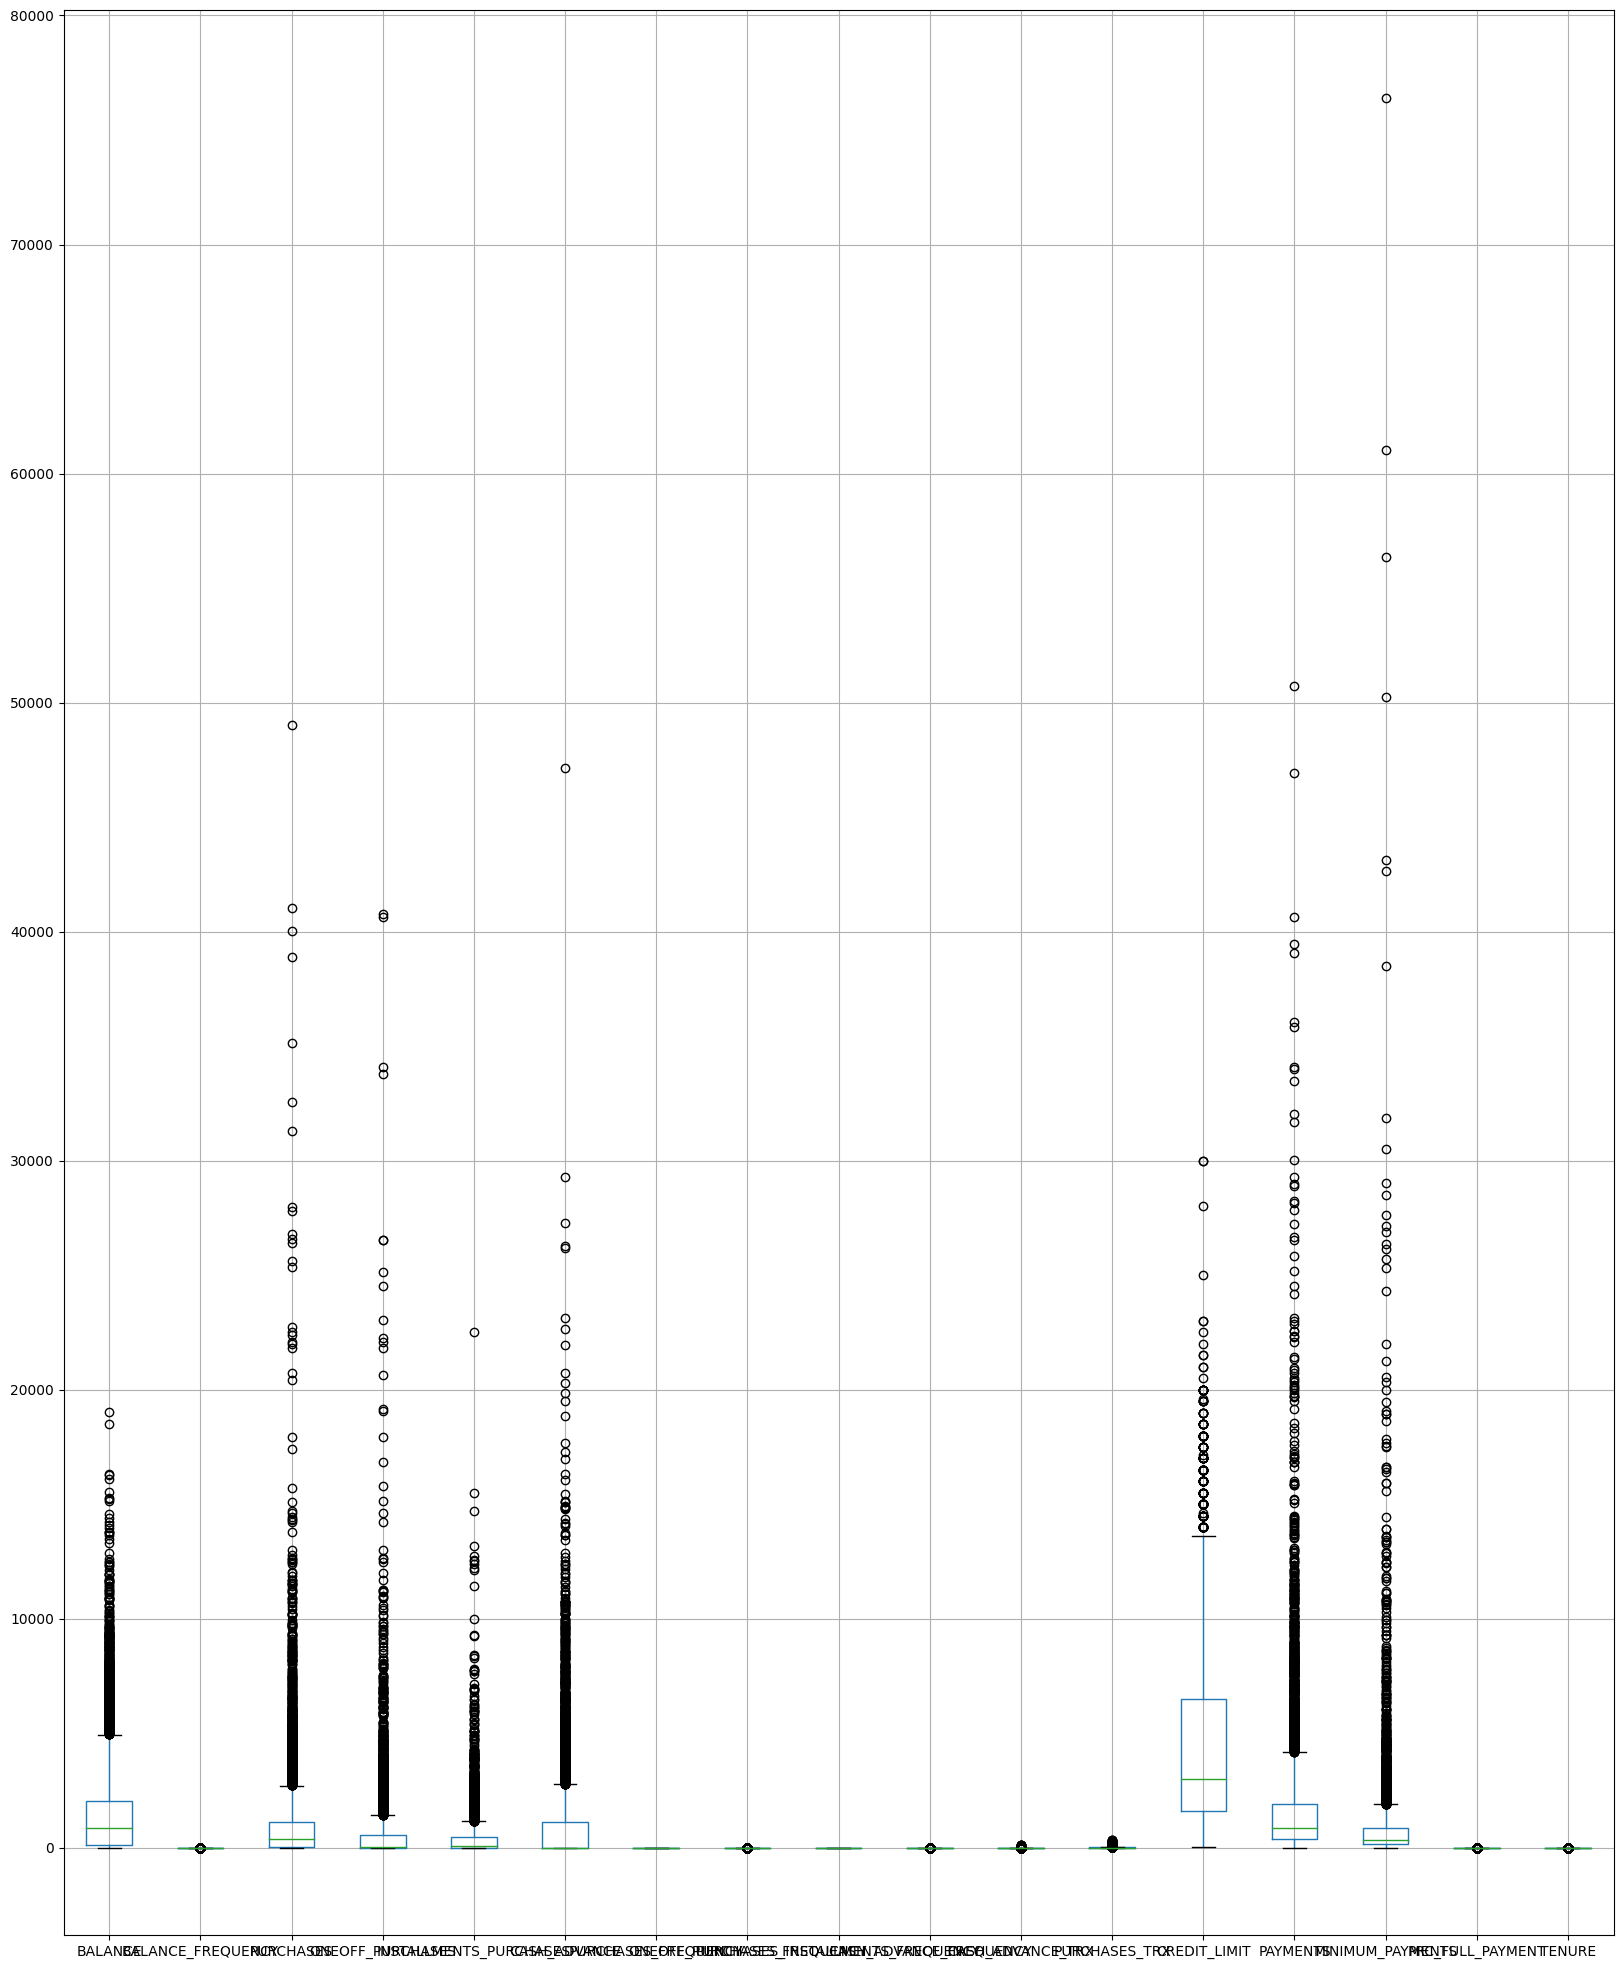

In [74]:
boxplot = data.boxplot(figsize=(20,25))

A boxplot is a graphical representation of the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Here's how to interpret the different parts of a boxplot:

* Median: The median is represented by the line that divides the box into two equal halves. It represents the middle value of the dataset.

* Quartiles: The first quartile (Q1) is the value below which 25% of the data falls, and the third quartile (Q3) is the value below which 75% of the data falls. The box represents the middle 50% of the data between Q1 and Q3.

* Whiskers: The whiskers are the lines that extend from the top and bottom of the box, and they represent the range of the data within 1.5 times the interquartile range (IQR) of the box. Data points outside this range are considered outliers and are plotted as individual points.

* Outliers: Outliers are individual points that fall outside the whiskers of the boxplot. They represent data points that are significantly different from the rest of the dataset.

 **so our data is filled with outliers**

## Visulisation

In [75]:
import matplotlib.pyplot as plt

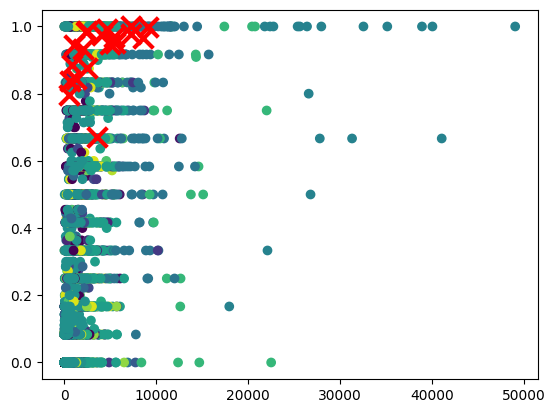

In [76]:
plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES_FREQUENCY'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()